In [2]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '71984ca3-e5fd-4fa4-add4-1448902134b1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-12-10T09:15:39.972Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 8965}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9874, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [3]:
type(data)

dict

In [4]:
import pandas as pd

# This allow you to see all the columns, not just like 15
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [5]:
# This normalize the data and make it all pretty in all dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9874,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.922960e+07,1.922960e+07,NaN,1,NaN,NaN,None,2022-12-10T09:14:00.000Z,17144.777999,1.795383e+10,-13.9851,-0.082871,-0.427341,0.989801,2.301642,-10.264417,-20.913093,3.296872e+11,38.6159,3.600403e+11,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
1,1027,Ethereum,ETH,ethereum,6269,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-12-10T09:14:00.000Z,1263.986431,4.796924e+09,-25.0907,-0.137905,-1.332743,-0.746174,4.470276,-1.657349,-28.368308,1.546789e+11,18.1175,1.546789e+11,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
2,825,Tether,USDT,tether,44443,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.570819e+10,7.314177e+10,NaN,3,NaN,NaN,None,2022-12-10T09:14:00.000Z,1.000066,2.169274e+10,-16.8597,0.001505,0.000352,0.003539,0.296060,0.007424,-0.021753,6.571252e+10,7.6968,7.314658e+10,None,2022-12-10T09:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-10 09:15:50.712517
3,1839,BNB,BNB,bnb,1150,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599686e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-12-10T09:14:00.000Z,286.782475,6.204556e+08,0.1612,-0.189765,-1.230588,-1.196059,1.497664,5.698237,-2.981255,4.587620e+10,5.3734,5.735649e+10,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
4,3408,USD Coin,USDC,usd-coin,8862,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.271181e+10,4.271181e+10,NaN,5,NaN,NaN,None,2022-12-10T09:14:00.000Z,0.999965,1.831409e+09,-17.0769,-0.000856,-0.013947,-0.004170,-0.115815,-0.015147,0.004037,4.271034e+10,5.0026,4.271034e+10,None,2022-12-10T09:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-10 09:15:50.712517
5,4687,Binance USD,BUSD,binance-usd,5728,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.209998e+10,2.209998e+10,NaN,6,NaN,NaN,None,2022-12-10T09:14:00.000Z,1.000032,5.111530e+09,-13.1953,-0.003016,-0.025402,0.001980,-0.161596,0.006090,-0.010238,2.210069e+10,2.5886,2.210069e+10,None,2022-12-10T09:14:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-12-10 09:15:50.712517
6,52,XRP,XRP,xrp,858,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.039546e+10,9.998919e+10,NaN,7,NaN,NaN,None,2022-12-10T09:14:00.000Z,0.386884,5.027858e+08,-33.3030,-0.296017,-1.115066,-0.764327,6.299308,-20.628604,8.659263,1.949719e+10,2.2837,3.868838e+10,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
7,74,Dogecoin,DOGE,dogecoin,610,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-12-10T09:14:00.000Z,0.096343,3.907242e+08,-10.7500,-0.346391,-1.936868,-2.716706,14.108759,62.563663,50.758084,1.278183e+10,1.4971,1.278183e+10,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
8,2010,Cardano,ADA,cardano,605,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.446638e+10,3.523064e+10,NaN,9,N

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '71984ca3-e5fd-4fa4-add4-1448902134b1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
   
# Note:
# I had to go in and put "jupyter notebook --Notebookapp.iopub_data_rate_limit=1e10"
# Into the Anaconda prompt to change this to allow to pull data    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
# Use this if you want to create a csv and append data to it  
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    #if not os.path.isfile(r'G:\DATA ANALITYCS\Portfolio Project\crypto\Pyhton Script\API.csv'):
    #    df.to_csv(r'G:\DATA ANALITYCS\Portfolio Project\crypto\Pyhton Script\API.csv', header='column_names')
    #else:
    #    df.to_csv(r'G:\DATA ANALITYCS\Portfolio Project\crypto\Pyhton Script\API.csv', mode='a', header=False)
    
# if that didn't work, try using local host URL

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner completed")
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2022-12-10T09:15:57.121Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 8965}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9874, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-10T09:16:58.369Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 8965}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9874, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-10T09:17:59.571Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 8965}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9874, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-10T09:19:01.032Z', 'error_code': 0, 'error_message': None, 'elapsed': 801, 'credit_count': 1, 'notice': None, 'total_count': 8965}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9874, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-10T09:20:02.890Z', 'error_code': 0, 'error_message': None, 'elapsed': 531, 'credit_count': 1, 'notice': None, 'total_count': 8965}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9874, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2022-12-10T09:21:04.352Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 8965}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9874, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

C:\Users\ROG\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


KeyboardInterrupt: 

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9874,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.922960e+07,1.922960e+07,NaN,1,NaN,NaN,None,2022-12-10T09:14:00.000Z,17144.777999,1.795383e+10,-13.9851,-0.082871,-0.427341,0.989801,2.301642,-10.264417,-20.913093,3.296872e+11,38.6159,3.600403e+11,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
1,1027,Ethereum,ETH,ethereum,6269,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-12-10T09:14:00.000Z,1263.986431,4.796924e+09,-25.0907,-0.137905,-1.332743,-0.746174,4.470276,-1.657349,-28.368308,1.546789e+11,18.1175,1.546789e+11,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
2,825,Tether,USDT,tether,44443,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.570819e+10,7.314177e+10,NaN,3,NaN,NaN,None,2022-12-10T09:14:00.000Z,1.000066,2.169274e+10,-16.8597,0.001505,0.000352,0.003539,0.296060,0.007424,-0.021753,6.571252e+10,7.6968,7.314658e+10,None,2022-12-10T09:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-10 09:15:50.712517
3,1839,BNB,BNB,bnb,1150,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599686e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-12-10T09:14:00.000Z,286.782475,6.204556e+08,0.1612,-0.189765,-1.230588,-1.196059,1.497664,5.698237,-2.981255,4.587620e+10,5.3734,5.735649e+10,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
4,3408,USD Coin,USDC,usd-coin,8862,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.271181e+10,4.271181e+10,NaN,5,NaN,NaN,None,2022-12-10T09:14:00.000Z,0.999965,1.831409e+09,-17.0769,-0.000856,-0.013947,-0.004170,-0.115815,-0.015147,0.004037,4.271034e+10,5.0026,4.271034e+10,None,2022-12-10T09:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-10 09:15:50.712517
5,4687,Binance USD,BUSD,binance-usd,5728,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.209998e+10,2.209998e+10,NaN,6,NaN,NaN,None,2022-12-10T09:14:00.000Z,1.000032,5.111530e+09,-13.1953,-0.003016,-0.025402,0.001980,-0.161596,0.006090,-0.010238,2.210069e+10,2.5886,2.210069e+10,None,2022-12-10T09:14:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-12-10 09:15:50.712517
6,52,XRP,XRP,xrp,858,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.039546e+10,9.998919e+10,NaN,7,NaN,NaN,None,2022-12-10T09:14:00.000Z,0.386884,5.027858e+08,-33.3030,-0.296017,-1.115066,-0.764327,6.299308,-20.628604,8.659263,1.949719e+10,2.2837,3.868838e+10,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
7,74,Dogecoin,DOGE,dogecoin,610,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-12-10T09:14:00.000Z,0.096343,3.907242e+08,-10.7500,-0.346391,-1.936868,-2.716706,14.108759,62.563663,50.758084,1.278183e+10,1.4971,1.278183e+10,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
8,2010,Cardano,ADA,cardano,605,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.446638e+10,3.523064e+10,NaN,9,N

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9874,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19229600.00000,19229600.00000,NaN,1,NaN,NaN,None,2022-12-10T09:14:00.000Z,17144.77800,17953832658.53864,-13.98510,-0.08287,-0.42734,0.98980,2.30164,-10.26442,-20.91309,329687223017.73584,38.61590,360040337987.91998,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
1,1027,Ethereum,ETH,ethereum,6269,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2022-12-10T09:14:00.000Z,1263.98643,4796923948.45051,-25.09070,-0.13791,-1.33274,-0.74617,4.47028,-1.65735,-28.36831,154678906371.05618,18.11750,154678906371.06000,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
2,825,Tether,USDT,tether,44443,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65708194111.58960,73141766321.23428,NaN,3,NaN,NaN,None,2022-12-10T09:14:00.000Z,1.00007,21692739872.99997,-16.85970,0.00150,0.00035,0.00354,0.29606,0.00742,-0.02175,65712515955.47664,7.69680,73146577095.60001,None,2022-12-10T09:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-10 09:15:50.712517
3,1839,BNB,BNB,bnb,1150,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159968642.27032,159979963.59043,NaN,4,NaN,NaN,None,2022-12-10T09:14:00.000Z,286.78247,620455624.08486,0.16120,-0.18977,-1.23059,-1.19606,1.49766,5.69824,-2.98125,45876203144.61390,5.37340,57356494989.92000,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
4,3408,USD Coin,USDC,usd-coin,8862,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42711814518.45457,42711814518.45457,NaN,5,NaN,NaN,None,2022-12-10T09:14:00.000Z,0.99997,1831409016.96636,-17.07690,-0.00086,-0.01395,-0.00417,-0.11582,-0.01515,0.00404,42710335623.77386,5.00260,42710335623.77000,None,2022-12-10T09:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-10 09:15:50.712517
5,4687,Binance USD,BUSD,binance-usd,5728,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,22099984029.50442,22099984029.50442,NaN,6,NaN,NaN,None,2022-12-10T09:14:00.000Z,1.00003,5111530239.58078,-13.19530,-0.00302,-0.02540,0.00198,-0.16160,0.00609,-0.01024,22100690693.74573,2.58860,22100690693.75000,None,2022-12-10T09:14:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-12-10 09:15:50.712517
6,52,XRP,XRP,xrp,858,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50395461568.00000,99989192051.00000,NaN,7,NaN,NaN,None,2022-12-10T09:14:00.000Z,0.38688,502785750.01997,-33.30300,-0.29602,-1.11507,-0.76433,6.29931,-20.62860,8.65926,19497187087.99030,2.28370,38688378836.82000,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:15:50.712517
7,74,Dogecoin,DOGE,dogecoin,610,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,8,NaN,NaN,None,2022-12-10T09:14:00.000Z,0.09634,390724227.17797,-10.75000,-0.34639,-1.93687,-2.71671,14.10876,62.56366,50.75808,12781834382.20043,1.49710,12781834382.20000,None,2022-12-10T09:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-10 09:1

In [11]:
# Let's look at the coin trends over the time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.06622,-0.43189,1.01157,2.32197,-10.24908,-20.88453
Ethereum,-0.12463,-1.34297,-0.74187,4.49951,-1.63613,-28.35505
Tether,0.00146,-0.00008,0.00220,0.30110,0.00661,-0.02138
BNB,-0.19433,-1.25508,-1.21351,1.50427,5.69872,-2.97922
USD Coin,-0.00198,-0.01201,-0.00290,-0.10977,-0.00809,0.00647
Binance USD,0.00412,-0.00973,0.02112,-0.18915,-0.00294,-0.00168
XRP,-0.25734,-1.12182,-0.72973,6.34061,-20.52509,8.68742
Dogecoin,-0.33659,-1.95407,-2.73091,14.05393,62.58442,50.78918
Cardano,-0.05666,-0.93964,-2.21617,-11.45747,-21.38028,-39.73788


In [12]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.06622
             quote.USD.percent_change_24h    -0.43189
             quote.USD.percent_change_7d      1.01157
             quote.USD.percent_change_30d     2.32197
             quote.USD.percent_change_60d   -10.24908
             quote.USD.percent_change_90d   -20.88453
Ethereum     quote.USD.percent_change_1h     -0.12463
             quote.USD.percent_change_24h    -1.34297
             quote.USD.percent_change_7d     -0.74187
             quote.USD.percent_change_30d     4.49951
             quote.USD.percent_change_60d    -1.63613
             quote.USD.percent_change_90d   -28.35505
Tether       quote.USD.percent_change_1h      0.00146
             quote.USD.percent_change_24h    -0.00008
             quote.USD.percent_change_7d      0.00220
             quote.USD.percent_change_30d     0.30110
             quote.USD.percent_change_60d     0.00661
             quote.USD.percent_change_90

In [13]:
type(df4)

# But, the df4 is not a dataframe. It is a Series and this is not what we want.

pandas.core.series.Series

In [14]:
# So, we gonna make the df4 to a dataframe and make the df5 variable

df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.06622
            quote.USD.percent_change_24h  -0.43189
            quote.USD.percent_change_7d    1.01157
            quote.USD.percent_change_30d   2.32197
            quote.USD.percent_change_60d -10.24908
            quote.USD.percent_change_90d -20.88453
Ethereum    quote.USD.percent_change_1h   -0.12463
            quote.USD.percent_change_24h  -1.34297
            quote.USD.percent_change_7d   -0.74187
            quote.USD.percent_change_30d   4.49951
            quote.USD.percent_change_60d  -1.63613
            quote.USD.percent_change_90d -28.35505
Tether      quote.USD.percent_change_1h    0.00146
            quote.USD.percent_change_24h  -0.00008
            quote.USD.percent_change_7d    0.00220
            quote.USD.percent_change_30d   0.30110
            quote.USD.percent_change_60d   0.00661
            quote.USD.percent_change_90d  -0.02138
BNB         quote.USD.percent_change_1h   -0.19433
            quote.USD.percent_change_24h  -1.25508
            quote.USD.percent_change_7d   -1.21351
            quote.USD.percent_change_30d   1.50427
            quote.USD.percent_change_60d   5.69872
            quote.USD.percent_change_90d  -2.97922
USD Coin    quote.USD.percent_change_1h   -0.00198
            quote.USD.percent_change_24h  -0.01201
            quote.USD.percent_change_7d   -0.00290
            quote.USD.percent_change_30d  -0.10977
            quote.USD.percent_change_60d  -0.00809
            quote.USD.percent_change_90d   0.00647
Binance USD quote.USD.percent_change_1h    0.00412
            quote.USD.percent_change_24h  -0.00973
            quote.USD.percent_change_7d    0.02112
            quote.USD.percent_change_30d  -0.18915
            quote.USD.percent_change_60d  -0.00294
            quote.USD.percent_change_90d  -0.00168
XRP         quote.USD.percent_change_1h   -0.25734
            quote.USD.percent_change_24h  -1.12182
            quote.USD.percent_change_7d   -0.72973
            quote.USD.percent_change_30d   6.34061
            quote.USD.percent_change_60d -20.52509
            quote.USD.percent_change_90d   8.68742
Dogecoin    quote.USD.percent_change_1h   -0.33659
            quote.USD.percent_change_24h  -1.95407
            quote.USD.percent_change_7d   -2.73091
            quote.USD.percent_change_30d  14.05393
            quote.USD.percent_change_60d  62.58442
            quote.USD.percent_change_90d  50.78918
Cardano     quote.USD.percent_change_1h   -0.05666
            quote.USD.percent_change_24h  -0.93964
            quote.USD.percent_change_7d   -2.21617
            quote.USD.percent_change_30d -11.45747
            quote.USD.percent_change_60d -21.38028
            quote.USD.percent_change_90d -39.73788
Polygon     quote.USD.percent_change_1h   -0.21511
            quote.USD.percent_change_24h  -2.15050
            quote.USD.percent_change_7d   -1.93728
            quote.USD.percent_change_30d  -3.79679
            quote.USD.percent_change_60d  12.21462
            quote.USD.percent_change_90d   0.87546
Polkadot    quote.USD.percent_change_1h   -0.15968
            quote.USD.percent_change_24h  -2.36630
            quote.USD.percent_change_7d   -5.13103
            quote.USD.percent_change_30d  -8.27882
            quote.USD.percent_change_60d -14.89653
            quote.USD.percent_change_90d -31.66642
Dai         quote.USD.percent_change_1h    0.02175
            quote.USD.percent_change_24h  -0.03649
            quote.USD.percent_change_7d   -0.00774
            quote.USD.percent_change_30d  -0.20817
            quote.USD.percent_change_60d   0.01674
            quote.USD.percent_change_90d  -0.01431
Litecoin    quote.USD.percent_change_1h   -0.34234
            quote.USD.percent_change_24h  -2.21433
            quote.USD.percent_change_7d   -0.42935
            quote.USD.percent_change_30d  40.04667
            quote.USD.percent_change_60d  46.77755
            quo

In [15]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it

index = pd.Index(range(90))
df6 = df5.reset_index() # the output is exactly what we want
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06622
1,Bitcoin,quote.USD.percent_change_24h,-0.43189
2,Bitcoin,quote.USD.percent_change_7d,1.01157
3,Bitcoin,quote.USD.percent_change_30d,2.32197
4,Bitcoin,quote.USD.percent_change_60d,-10.24908
5,Bitcoin,quote.USD.percent_change_90d,-20.88453
6,Ethereum,quote.USD.percent_change_1h,-0.12463
7,Ethereum,quote.USD.percent_change_24h,-1.34297
8,Ethereum,quote.USD.percent_change_7d,-0.74187
9,Ethereum,quote.USD.percent_change_30d,4.49951


In [16]:
# Then, we change the column name 'level_1' with 'percent_change'. So, we can get the good visualization

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06622
1,Bitcoin,quote.USD.percent_change_24h,-0.43189
2,Bitcoin,quote.USD.percent_change_7d,1.01157
3,Bitcoin,quote.USD.percent_change_30d,2.32197
4,Bitcoin,quote.USD.percent_change_60d,-10.24908
5,Bitcoin,quote.USD.percent_change_90d,-20.88453
6,Ethereum,quote.USD.percent_change_1h,-0.12463
7,Ethereum,quote.USD.percent_change_24h,-1.34297
8,Ethereum,quote.USD.percent_change_7d,-0.74187
9,Ethereum,quote.USD.percent_change_30d,4.49951


In [19]:
# I need to change the name of column percent_change right here before we made the catplot

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.06622
1,Bitcoin,24h,-0.43189
2,Bitcoin,7d,1.01157
3,Bitcoin,30d,2.32197
4,Bitcoin,60d,-10.24908
5,Bitcoin,90d,-20.88453
6,Ethereum,1h,-0.12463
7,Ethereum,24h,-1.34297
8,Ethereum,7d,-0.74187
9,Ethereum,30d,4.49951


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

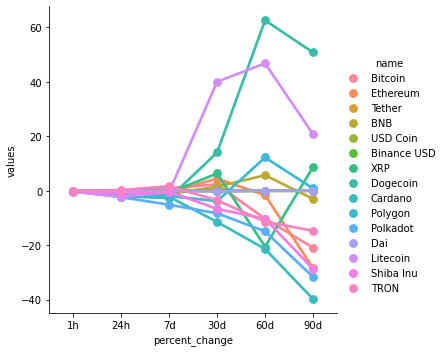

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

# But, the column names at percent_change is mess up. So, I change the column names of that values(go up to see the code)
# After that, we run it again

In [21]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want
# We just want to see the Bitcoin

df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,17144.77800,2022-12-10 09:15:50.712517
0,Bitcoin,17144.77800,2022-12-10 09:15:57.616760
0,Bitcoin,17145.21252,2022-12-10 09:16:58.911715
0,Bitcoin,17145.82155,2022-12-10 09:18:00.067849
0,Bitcoin,17145.03008,2022-12-10 09:19:01.578322
0,Bitcoin,17146.01498,2022-12-10 09:20:03.542233
0,Bitcoin,17146.79380,2022-12-10 09:21:04.871099


In [22]:
# Because of an Value Error that I got before, I got help from my friend on linkedin. Thanks to him.
# Here's the solution that he gave

dfIndexed = df8.reset_index().drop('index', axis=1)

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

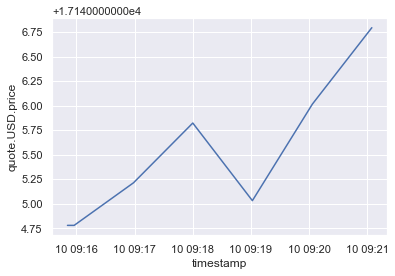

In [25]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data = dfIndexed)

# And I did it!!

In [ ]:
# Thank you @mahimai_raja for your help